In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
headers = ['url', 'price', 'title', 'geo_lat', 'geo_long', 'rating',
           'number_reviews', 'sleeps', 'bedrooms', 'bathrooms', 'min_stay',
           'has_elevator', 'has_concierge', 'has_patio', 'has_pool', 'floor_area',
           'distance_to_TS_meter', 'distance_to_TS']

data_file = 'data/homeaway_rentals_nyc_PARSED.csv' 
df = pd.read_csv(data_file, sep='\t', header=0, names=headers, index_col=0)

# Try modeling with nightly prices under $1000
# df = df.loc[df.price < 1000].reset_index()

# do some feature engineering
# df['title_luxury'] = df['title'].str.contains("luxury")


In [3]:
# # Not all rentals have reviews
# df_with_reviews = df[df.rating.notnull()]

# # Plot some basic graphs to understand the data
# fig_overview, ax_overview = plt.subplots(2, 2, figsize=(15, 15))

# ax_overview[0][0].hist(df.bedrooms.as_matrix())
# ax_overview[0][0].set_title('Distribution of Bedroom Count')
# ax_overview[0][0].set_xlabel('# Bedrooms')
# ax_overview[0][0].set_ylabel('Frequency')

# ax_overview[0][1].hist(df_with_reviews.rating.as_matrix())
# ax_overview[0][1].set_title('Distribution of Ratings')
# ax_overview[0][1].set_xlabel('Rating')
# ax_overview[0][1].set_ylabel('Frequency')
# ax_overview[0][1].xaxis.set_ticks(np.arange(1,5,1))

# ax_overview[1][0].hist(df.price.as_matrix())
# ax_overview[1][0].set_title('Distribution of Nightly Rental Prices')
# ax_overview[1][0].set_xlabel('Rental Price per Night')
# ax_overview[1][0].set_ylabel('Frequency')

# ax_overview[1][1].hist(df.distance_to_TS.as_matrix())
# ax_overview[1][1].set_title('Distribution of Driving Distance to Times Square')
# ax_overview[1][1].set_xlabel('Driving distance to Time Square (m)')
# ax_overview[1][1].set_ylabel('Frequency')

In [4]:
df.describe()

,price,geo_lat,geo_long,rating,number_reviews,sleeps,bedrooms,bathrooms,min_stay,floor_area,distance_to_TS_meter,distance_to_TS
count,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000
mean,319.008181,40.742916,-73.973800,4.709929,6.543583,4.522708,1.654161,1.240621,9.606488,864.404231,7985.072779,4.961693
std,267.393718,0.045451,0.047617,0.402262,16.342531,1.816996,0.925254,0.520936,12.121074,455.860532,6628.695069,4.118879
min,19.000000,40.571015,-74.257572,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,51.000000,0.031690
25%,160.000000,40.718100,-73.993685,4.800000,0.000000,3.000000,1.000000,1.000000,2.000000,650.000000,2827.000000,1.756616
50%,247.000000,40.745020,-73.980246,4.800000,0.000000,4.000000,2.000000,1.000000,3.000000,750.000000,5644.000000,3.507018
75%,386.000000,40.767085,-73.952842,4.800000,4.000000,6.000000,2.000000,1.000000,11.000000,900.000000,11440.000000,7.108484
max,2688.000000,40.974511,-73.712820,5.000000,175.000000,9.000000,6.000000,6.000000,90.000000,5000.000000,32177.000000,19.993855


In [5]:
# Get a sense for how features correlate with price
features_all = ['rating', 'number_reviews', 'sleeps', 'bedrooms', 'bathrooms', 'min_stay',
               'has_elevator', 'has_concierge', 'has_patio', 'has_pool', 'floor_area',
               'distance_to_TS']
X = df.loc[:, features_all]
y = df['price']

# Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df.corr()['price'][['price'] + features_all].sort_values()

distance_to_TS   -0.273134
min_stay         -0.154342
number_reviews   -0.089177
has_pool          0.017007
has_concierge     0.044052
rating            0.094314
has_patio         0.113093
has_elevator      0.137706
sleeps            0.366632
floor_area        0.377196
bedrooms          0.430877
bathrooms         0.514675
price             1.000000
Name: price, dtype: float64

In [6]:
# Get a sense for how features correlate with each other
# X.corr()

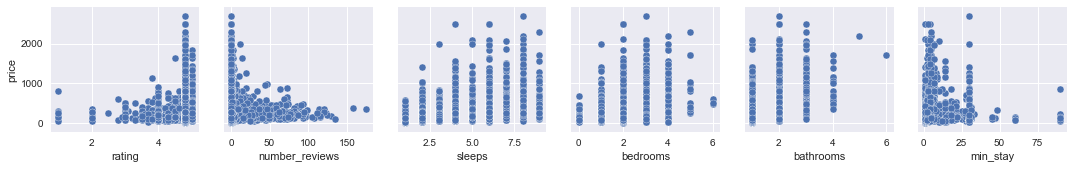

In [7]:
sns.pairplot(data=df, y_vars=['price'], x_vars=features_all[0:6])

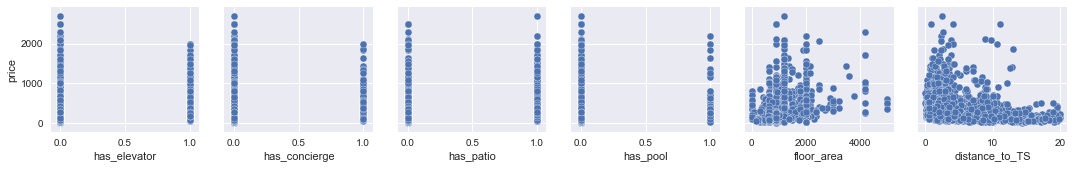

In [8]:
sns.pairplot(data=df, y_vars=['price'], x_vars=features_all[6:])

## Multiple Linear Regression with # Bedrooms and Distance from Times Square

In [9]:
# Helper functions
def print_error(title, y_test, y_predict_test):
    print ('Errors for ', title, ':')
    print ("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict_test)))
    print ("MAE:", mean_absolute_error(y_test, y_predict_test))
    print ("R2:", r2_score(y_test, y_predict_test))

features_2 = ['bedrooms', 'distance_to_TS']
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:, features_2], y_train)
list(zip(features_2, lr_model2.coef_))

[('bedrooms', 64.558833934014658), ('bathrooms', 208.39321564910068)]

In [10]:
y_test_pred2 = lr_model2.predict(X_test.loc[:, features_2])
print_error('Multiple Linear Regression with 2 variables', y_test, y_test_pred2)

Errors for  Multiple Linear Regression with 2 variables :
RMSE: 230.385960802
MAE: 139.473077394
R2: 0.289806332169


In [11]:
np.mean(y_test)

311.4407894736842

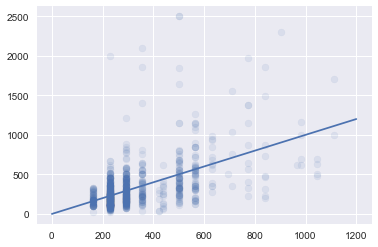

In [12]:
## Plot predicted price vs actual price
plt.scatter(y_test_pred2, y_test, alpha=.1)
plt.plot(np.linspace(0, 1200, 10), np.linspace(0, 1200, 10))

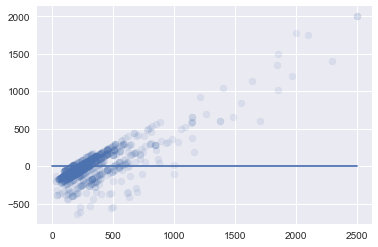

In [13]:
## Residual Plot
plt.scatter(y_test, y_test - y_test_pred2, alpha=.1)
plt.plot(np.linspace(0, 2500, 10), np.linspace(0, 0, 10))

## Multiple Linear Regression with 4 variables

In [14]:
features_4 = ['bedrooms', 'bathrooms',
              'min_stay', 'distance_to_TS']
lr_model_4 = LinearRegression()
lr_model_4.fit(X_train.loc[:, features_4], y_train)
list(zip(features_4, lr_model_4.coef_))

[('bedrooms', 73.488179803105496),
 ('bathrooms', 201.91921442383537),
 ('min_stay', -4.0400695170433778),
 ('distance_to_TS', -21.926905198295671)]

In [15]:
y_test_pred4 = lr_model_4.predict(X_test.loc[:, features_4])
print_error('Multiple Linear Regression with 4 variables', y_test, y_test_pred4)

Errors for  Multiple Linear Regression with 4 variables :
RMSE: 210.764170376
MAE: 119.715763601
R2: 0.405628001485


In [ ]:
## Multiple Linear Regression with all variables

In [16]:
lr_model_all = LinearRegression()
lr_model_all.fit(X_train.loc[:, features_all], y_train)
list(zip(features_all, lr_model_all.coef_))

[('rating', 48.831244280376133),
 ('number_reviews', -1.43028588535886),
 ('sleeps', 11.414347157466674),
 ('bedrooms', 50.484456602125654),
 ('bathrooms', 185.83113984707754),
 ('min_stay', -4.2183148669083756),
 ('has_elevator', 32.110803714374072),
 ('has_concierge', 8.2156636166867969),
 ('has_patio', 33.659585680364202),
 ('has_pool', -4.2959292598164929),
 ('floor_area', 0.024022910504307049),
 ('distance_to_TS', -20.930537643498717)]

In [17]:
y_test_pred_all = lr_model_all.predict(X_test.loc[:, features_all])
print_error('Multiple Linear Regression with all variables', y_test, y_test_pred_all)

Errors for  Multiple Linear Regression with all variables :
RMSE: 208.572409094
MAE: 118.094173587
R2: 0.417925613117


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
features_all_tree = ['number_reviews', 'sleeps', 'bedrooms', 'bathrooms', 'min_stay',
                   'has_elevator', 'has_concierge', 'has_patio', 'has_pool', 'floor_area',
                   'distance_to_TS', 'geo_lat', 'geo_long']
X = df.loc[:, features_all_tree]
y = df['price']

# Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr_model_all = RandomForestRegressor()
lr_model_all.fit(X_train.loc[:, features_all_tree], y_train)
list(zip(features_all_tree, lr_model_all.feature_importances_))

[('number_reviews', 0.037490418453805213),
 ('sleeps', 0.040209768559303229),
 ('bedrooms', 0.049541304887002854),
 ('bathrooms', 0.2699891796899635),
 ('min_stay', 0.07924195314699764),
 ('has_elevator', 0.0096904336276446568),
 ('has_concierge', 0.0081739161184947277),
 ('has_patio', 0.014957789528421922),
 ('has_pool', 0.0070773821805080305),
 ('floor_area', 0.063971945851810527),
 ('distance_to_TS', 0.18239946544929833),
 ('geo_lat', 0.084176361884426912),
 ('geo_long', 0.15308008062232248)]

In [19]:
test_set_pred_all = lr_model_all.predict(X_test.loc[:, features_all_tree])

# RMSE
np.sqrt(np.mean((test_set_pred_all - y_test)**2))

198.95432077242495

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gbmodel1 = GradientBoostingRegressor(subsample=0.7, learning_rate=0.1, max_depth=4, n_estimators=1000)
gbmodel1.fit(X_train, y_train)
gb1_test_pred = gbmodel1.predict(X_test)
np.sqrt(np.mean((gb1_test_pred - y_test)**2))
list(zip(features_all_tree, gbmodel1.feature_importances_))

[('number_reviews', 0.039498228707701269),
 ('sleeps', 0.048622889829158376),
 ('bedrooms', 0.024568508281097284),
 ('bathrooms', 0.035036720016535343),
 ('min_stay', 0.064613624220649424),
 ('has_elevator', 0.012092901759242386),
 ('has_concierge', 0.011381117110918819),
 ('has_patio', 0.010104403708694823),
 ('has_pool', 0.0046058957574842381),
 ('floor_area', 0.075031087601572621),
 ('distance_to_TS', 0.23920106520191092),
 ('geo_lat', 0.20815515310242697),
 ('geo_long', 0.22708840470260752)]